In [38]:
import pandas as pd
import numpy as np

In [39]:
df_londoncrime = pd.read_csv('london_crime_by_lsoa.csv')
df_londoncrime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [40]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

# A. Area Plot

**Question :** Compare trends in Croydon, Barnet & Lewisham crime numbers

### **pre-processing**

In [41]:
df_LC = df_londoncrime.drop(['lsoa_code','month'], axis=1)
df_LC.head()

,borough,major_category,minor_category,value,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008


In [42]:
df_crime = df_LC.groupby(['borough','year'], axis=0).sum()
df_crime.head()

value
borough              year       
Barking and Dagenham 2008  17656
                     2009  17713
                     2010  17130
                     2011  16686
                     2012  15990

In [43]:
df_unstack = df_crime.unstack()
df_unstack.head()

value                                                   \
year                   2008   2009   2010   2011   2012   2013   2014   2015   
borough                                                                        
Barking and Dagenham  17656  17713  17130  16686  15990  15759  15426  16346   
Barnet                23944  23449  23416  24007  23573  22510  22572  24036   
Bexley                15305  14445  13166  11325  11669  11552  11844  11990   
Brent                 23504  24748  25512  27669  26357  23759  24426  24883   
Bromley               24015  21858  19572  19868  19622  18945  19668  20637   

                             
year                   2016  
borough                      
Barking and Dagenham  16741  
Barnet                24684  
Bexley                12840  
Brent                 26693  
Bromley               20164

In [44]:
df_CBL = df_unstack.loc[['Croydon', 'Barnet', 'Lewisham']]
df_CBL = df_CBL.transpose()
df_CBL

borough     Croydon  Barnet  Lewisham
      year                           
value 2008    29516   23944     27054
      2009    29784   23449     25182
      2010    29373   23416     24532
      2011    29830   24007     24201
      2012    30189   23573     23652
      2013    27444   22510     22074
      2014    27357   22572     21101
      2015    28089   24036     23437
      2016    28712   24684     23904

#### Visualization

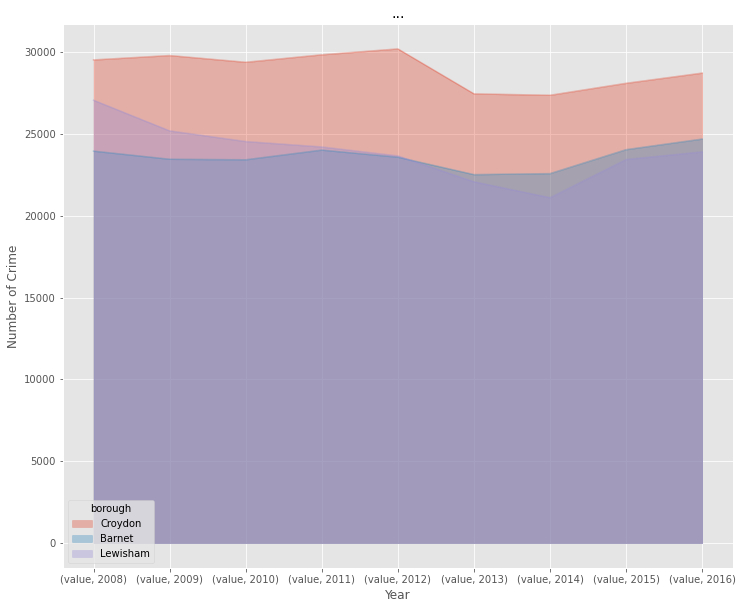

In [45]:
df_CBL.plot(kind='area',
               alpha=0.35,
              stacked=False,
              figsize=(12,10)
              )
plt.title('...')
plt.ylabel('Number of Crime')
plt.xlabel('Year')
plt.show()

#### Conclusion

dari plot di atas, dapat diketahui bahwa Barnet dan Lewisham memiliki tren jumlah kejahatan yang mirip meskipun pada distrik Lewisham tren cenderung menurun. Sedangkan pada distrik Croydon memiliki trend yang kurang lebih sama tetapi dengan jumlah kejahatan yang jauh lebih tinggi dari jumlah kejahatan pada distrik Barnet dan Lewisham

# B. Histogram

**Question :** What is the crime numbers distribution in Southwark during 2008 - 2016?

#### pre-processing

In [46]:
df_unstack.head()

value                                                   \
year                   2008   2009   2010   2011   2012   2013   2014   2015   
borough                                                                        
Barking and Dagenham  17656  17713  17130  16686  15990  15759  15426  16346   
Barnet                23944  23449  23416  24007  23573  22510  22572  24036   
Bexley                15305  14445  13166  11325  11669  11552  11844  11990   
Brent                 23504  24748  25512  27669  26357  23759  24426  24883   
Bromley               24015  21858  19572  19868  19622  18945  19668  20637   

                             
year                   2016  
borough                      
Barking and Dagenham  16741  
Barnet                24684  
Bexley                12840  
Brent                 26693  
Bromley               20164

In [47]:
df_hist = df_unstack.loc[['Southwark']].transpose()
df_hist

borough     Southwark
      year           
value 2008      33470
      2009      30623
      2010      31320
      2011      30723
      2012      30737
      2013      31128
      2014      28912
      2015      30260
      2016      31636

#### visualization

Text(0.5, 0, 'Number of Crime')

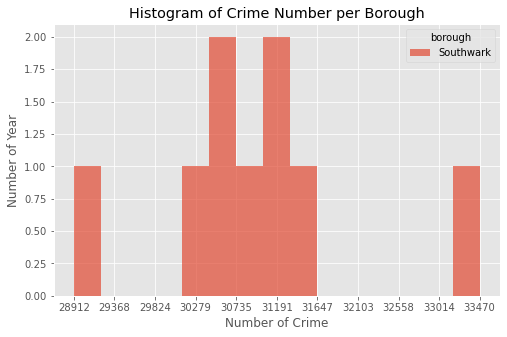

In [48]:
df_hist.plot(kind='hist', 
             figsize=(8,5), 
             bins=15, 
             alpha=0.7,
             xticks=bin_edges)

plt.title('Histogram of Crime Number per Borough')
plt.ylabel('Number of Year')
plt.xlabel('Number of Crime')

#### conclusion

Berdasarkan histogram di atas, dapat diketahui bahwa persebaran datanya cenderung simetris yang menandakan bahwa mean, median dan modusnya bernilai sama. Dapat diketahui pula bahwa terdapat data pencilan yakni pertama terdapat di antara 28912 - 29368 serta di antara 33014 - 33470.

# C. Bar Chart

**Question :** Show the total number of crime in London from the top 15 borough for 2008 - 2016

#### pre-processing

In [49]:
totals=df_londoncrime.groupby('borough').sum()
Totals=totals[['value']]
Totals.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


#### visualization

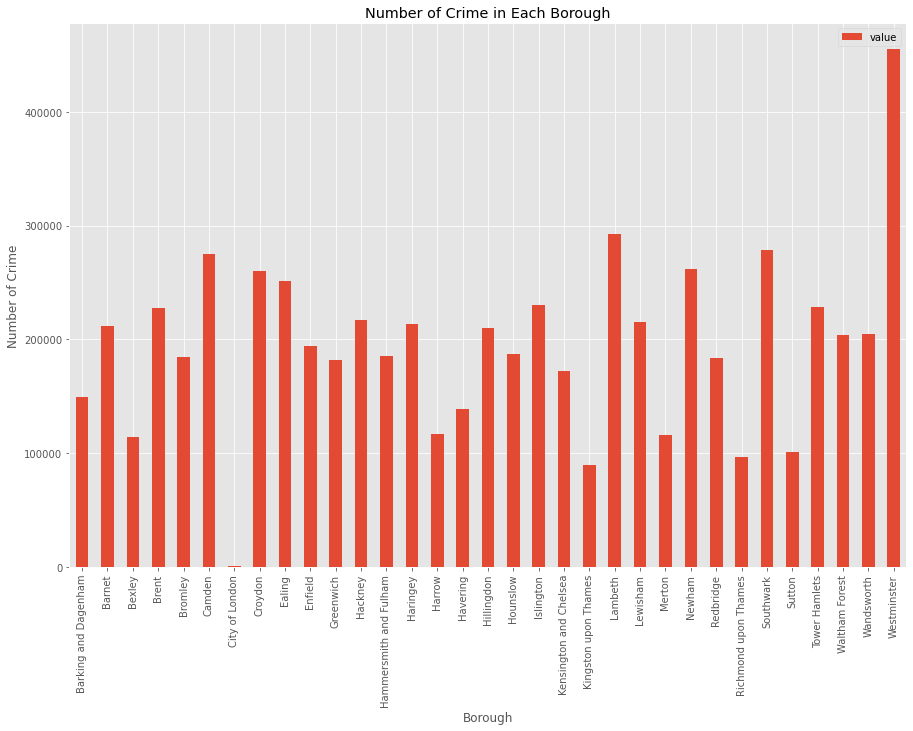

In [50]:
Totals.plot(kind='bar',figsize=(15,10))

plt.title('Number of Crime in Each Borough')
plt.ylabel('Number of Crime')
plt.xlabel('Borough')
plt.show()

### conclusion

Berdasarkan plot di atas, jumlah kejahatan di distrik Westminster melonjak sangat tinggi dibandingkan dengan distrik-distrik lainnya, sedangkan jumlah kejahatan di distrik City of London sangat rendah dibandingkan dengan distrik lainnya

# D. Pie Chart

**Question :** Show the propotion of the number of crimes by major crime category in London from 2008 - 2016!

#### pre-processing

In [51]:
df_crime_category = df_londoncrime.groupby('major_category').sum()
crime_category = df_crime_category[['value']]
crime_category.head()

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349


#### visualization

(-1.1011448671446487,
 1.1105947313335642,
 -1.1184666805847452,
 1.1008793681456797)

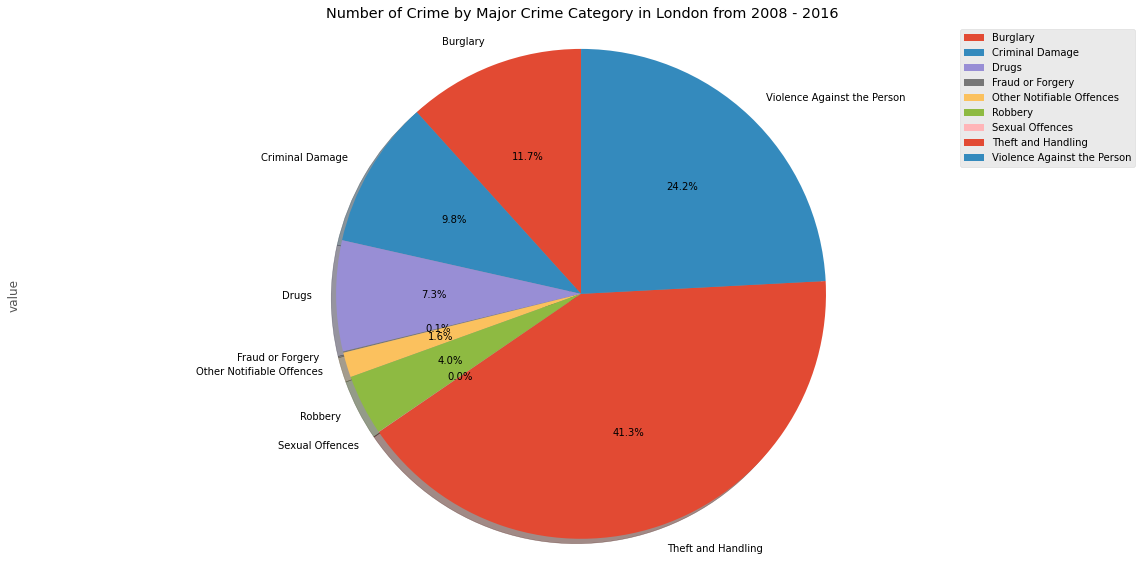

In [52]:
crime_category.plot(kind='pie',
                    figsize=(20,10),
                    autopct='%1.1f%%',
                    startangle=90,
                    shadow=True,
                    subplots='True'
                    )

plt.title('Number of Crime by Major Crime Category in London from 2008 - 2016')
plt.axis('equal')

#### conclusion

Berdasarkan grafik pie chart di atas dapat diketahui bahwa kejahatan dengan kategory Theft and Handling memiliki proporsi/presentasi terbesar yang terjadi di London selama tahun 2008 - 2016 dengan presentasi sebesar 41.3%, sedangkat presentasi kejahatan terendah yaitu kejahatan dengan kategori Fraud or Forgery sebesar 0.1%

# E. Box Plot

**Question :** Show the distribution of the number of crimes in Newham for the period 2008 - 2016

#### pre-processing

In [53]:
df_unstack.head()

value                                                   \
year                   2008   2009   2010   2011   2012   2013   2014   2015   
borough                                                                        
Barking and Dagenham  17656  17713  17130  16686  15990  15759  15426  16346   
Barnet                23944  23449  23416  24007  23573  22510  22572  24036   
Bexley                15305  14445  13166  11325  11669  11552  11844  11990   
Brent                 23504  24748  25512  27669  26357  23759  24426  24883   
Bromley               24015  21858  19572  19868  19622  18945  19668  20637   

                             
year                   2016  
borough                      
Barking and Dagenham  16741  
Barnet                24684  
Bexley                12840  
Brent                 26693  
Bromley               20164

In [54]:
df_newham = df_unstack.loc[['Newham']].transpose()
df_newham

borough     Newham
      year        
value 2008   29752
      2009   28610
      2010   30728
      2011   27978
      2012   30067
      2013   27577
      2014   28005
      2015   29217
      2016   30090

In [55]:
df_newham.describe()

borough,Newham
count,9.000000
mean,29113.777778
std,1119.162385
min,27577.000000
25%,28005.000000
50%,29217.000000
75%,30067.000000
max,30728.000000


#### visualization

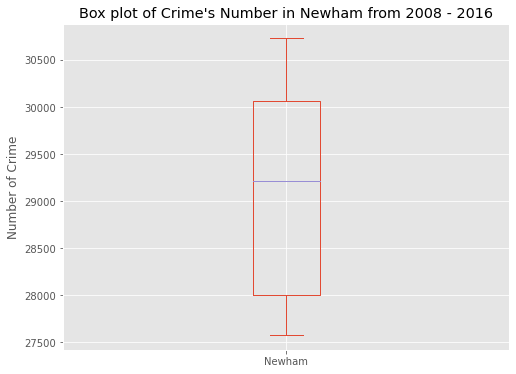

In [56]:
df_newham.plot(kind='box', figsize=(8,6))

plt.title("Box plot of Crime's Number in Newham from 2008 - 2016")
plt.ylabel('Number of Crime')
plt.show()

#### conclusion

Berdasarkan plot di atas, dapat diketahui bahwa 
1. Angka minimal terjadinya kejahatan di Newham adalah sekitar 27600, dan maximal angka terjadinya kejahatan sekitar 30700
2. 25% angka kejahatan yang terjadi di Newham pada tahun 2008 - 2016 adalah lebih kecil dari 28000 (Kuartil Pertama)
3. 75% angka kejahatan yang terjadi di Newham pada tahun 2008 - 2016 adalah lebih kecil dari 30100 (Kuartil Ketiga)

# F. Scatter Plot

**Question :** Create a scatter plot of the total crimes in London from 2008 - 2016!

#### pre-processing

In [57]:
df_LC.head()

,borough,major_category,minor_category,value,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008


In [58]:
df_total = df_LC.groupby(['year'], axis=0).sum()
df_total

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [59]:
df_total.reset_index(inplace=True)
df_total

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


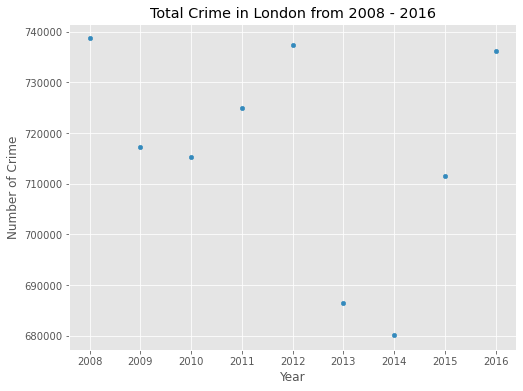

In [60]:
df_total.plot(kind='scatter', x='year', y='value', figsize=(8, 6))

plt.title('Total Crime in London from 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of Crime')
plt.show()

#### conclusion

Berdasarkan data di atas dapat diketahui bahwa persebaran jumlah angka kejahatan yang terjadi di London pada tahun 2008 - 2016 tersebar dan tidak membentuk pola tertentu

# G. Word Clouds

In [61]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [62]:
stopwords = set(STOPWORDS) 

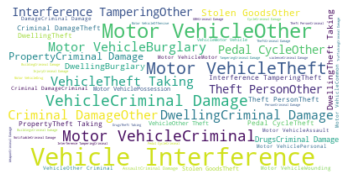

In [63]:
text = df_londoncrime['minor_category']

wordcloud = WordCloud(stopwords=stopwords,  background_color="white").generate(''.join(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# H. Folium Maps

In [64]:
import folium

In [65]:
borough=df_londoncrime[['borough','value']]

world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
world_map=folium.Map(location=[51.509865,-0.118092],zoom_start=10,tiles ='Mapbox Bright')

world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=borough,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'
    
)

world_map

# I. Overall Analysis

Ploting pairwise of columns


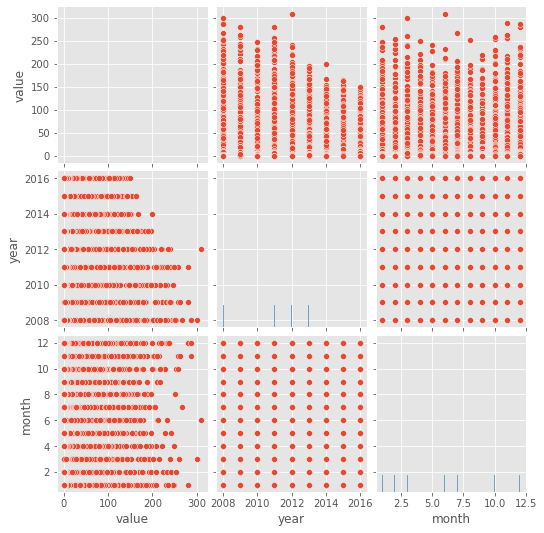

In [66]:
import seaborn as sns

print("Ploting pairwise of columns")
sns.pairplot(df_londoncrime)